In [1]:
%load_ext autoreload
%autoreload 2

# Intro to 4D-STEM data: visualization and analysis with py4DSTEM



### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Ben Savitzky (bhsavitzky@lbl.gov)
- Steve Zeltmann (steven.zeltmann@berkeley.edu)
- Stephanie Ribet (sribet@u.northwestern.edu)
- Alex Rakowski (arakowski@lbl.gov)
- Colin Ophus (clophus@lbl.gov)


Last updated:
- Mar 2023 March 22, v0.14.0

## Set up the environment

In [2]:
# Initialization - import the needed packages.
# For this tutorial, we will need py4DSTEM:
import py4DSTEM

# This line displays the current version of py4DSTEM:
py4DSTEM.__version__

'0.14.0'

In [3]:
# py4DSTEM has a quick method to see which modules are installed:
py4DSTEM.check_config()

Checking Module Dependencies
 All Dependencies for Base are Installed 
 Not All Dependencies for Ipyparallel are Installed
 Not All Dependencies for Cuda are Installed
 Not All Dependencies for Acom are Installed
 Not All Dependencies for Aiml are Installed
 Not All Dependencies for Aiml-cuda are Installed
 Not All Dependencies for Numba are Installed


For this tutorial, only the base dependencies are needed.

---
# Download the tutorial data <a class="anchor" id="part_00"></a>

You can download the tutorial dataset here: (501 megabytes)
* [Simulated single crystal and polycrystalline gold](https://drive.google.com/file/d/1PmbCYosA1eYydWmmZebvf6uon9k_5g_S/view?usp=sharing)

# Load data

In [4]:
# Set the filepath

filepath_data = "/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/data_binned.h5"

In [5]:
py4DSTEM.read( filepath_data )

py4DSTEM file version 0.11.10
Index     Type              Shape                   Name                                                  
-----     ----              -----                   ----                                                  
  0       DataCube          (100, 84, 125, 125)     polyAu_4DSTEM                                         
  1       DataCube          (100, 84, 125, 125)     simulation_4DSTEM                                     
  2       DiffractionSlice  (512, 512)              defocused_probe                                       
  3       DiffractionSlice  (125, 125)              probe_template                                        


The file we opened holds multiple pieces of data.  If this is the case, if we don't specify which data we want
the `read` function will print a list of the data contained.  To load some data, we can specify the data we want with its name.

In [6]:
# Load the data

datacube = py4DSTEM.read(
    filepath_data,
    data_id = 'polyAu_4DSTEM'     # Load the DataCube called 'polyAu_4DSTEM'
)

What we just did was load the data inside this file called 'polyAu_4DSTEM', and save it as the variable `datacube`.
The output of the previous cell told us that the 'Type' of this data was 'DataCube'.


So exactly is a py4DSTEM DataCube?  Let's try just passing it directly to the Python interpreter:

In [7]:
datacube

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called 'polyAu_4DSTEM',
          with dimensions:

          Rx = [0,1,...] pixels
          Ry = [0,1,...] pixels
          Qx = [0,1,...] pixels
          Qy = [0,1,...] pixels
)

This is a high-level description of a py4DSTEM datacube - it's four-dimensional, with a shape

`(100 x 84 x 125 x 125)`

The first two indices correspond to real space, which is why they are labeled `Rx` and `Ry`.  The second two indices correspond to diffraction space, and thus are labeled `Qx` and `Qy`.  Currently, we have provided no calibration or pixel sizes to this datacube, which is why the units are in `pixels` and start at `0` with a step of `1`.

In [8]:
# The data itself lives in the `.data` attribute, and is a numpy array

datacube.data

array([[[[36, 29, 35, ..., 29, 31, 33],
         [34, 35, 21, ..., 32, 41, 36],
         [26, 32, 31, ..., 32, 29, 33],
         ...,
         [29, 40, 39, ..., 30, 30, 34],
         [32, 35, 31, ..., 38, 36, 35],
         [39, 33, 29, ..., 41, 30, 34]],

        [[38, 30, 35, ..., 34, 21, 26],
         [42, 26, 30, ..., 30, 31, 40],
         [38, 30, 26, ..., 32, 35, 31],
         ...,
         [29, 31, 34, ..., 29, 31, 30],
         [28, 24, 38, ..., 26, 35, 37],
         [35, 34, 38, ..., 35, 31, 32]],

        [[28, 43, 33, ..., 33, 32, 30],
         [35, 32, 35, ..., 29, 33, 36],
         [28, 39, 34, ..., 34, 30, 30],
         ...,
         [27, 32, 33, ..., 31, 30, 39],
         [25, 32, 39, ..., 36, 40, 29],
         [26, 40, 39, ..., 34, 33, 28]],

        ...,

        [[29, 28, 38, ..., 32, 34, 30],
         [31, 31, 36, ..., 23, 27, 32],
         [32, 29, 32, ..., 29, 37, 35],
         ...,
         [34, 34, 37, ..., 32, 30, 28],
         [35, 35, 28, ..., 34, 34, 34],
    

In [9]:
datacube.data.shape

(100, 84, 125, 125)

# Basic visualization

Evaluating data quality and deciding how to proceed with the analysis almost always begins with visualization. Here, we will go through some visualization functions py4DSTEM uses to visualize 4D data.

Let's first look at a single diffraction pattern. The dataset size is `(100 x 84 x 125 x 125)`, with the first two dimensions representing the position of the electon beam on the sample (`real space`) and the last two dimensions representing pixels on the detector the electrons scattered into (`diffraction space`).  To get a single diffraction pattern we much select an (x,y) probe position with an x-coordinate in the range `0:100` (which in python means from index 0 to 99), and a y-coordinate in the range `0:84`. Let's arbitrarily choose probe position (50,50) - but feel free to change these indices below!

In [10]:
# importing py4DSTEM's show function into the main namespace will simplify syntax a little!

from py4DSTEM.visualize import show

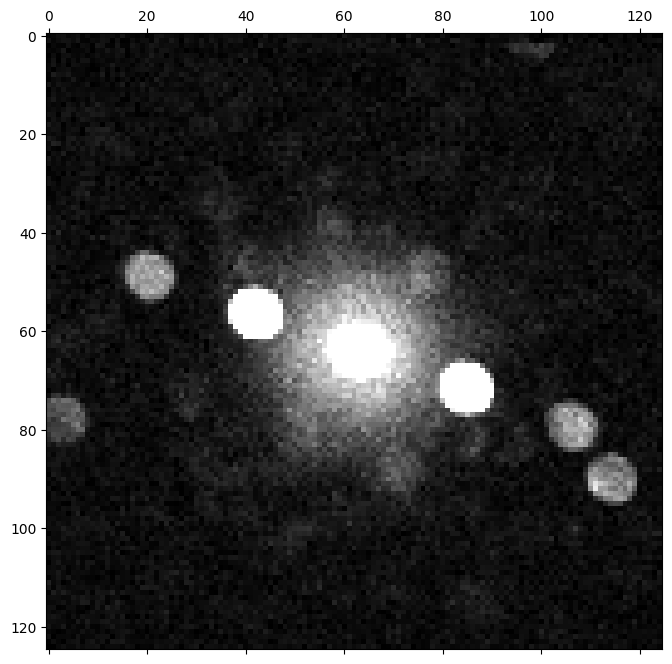

In [11]:
# get and show the diffraction pattern at scan position (rx,ry) = (10,30)

dp = datacube.data[10,30]

show(dp)

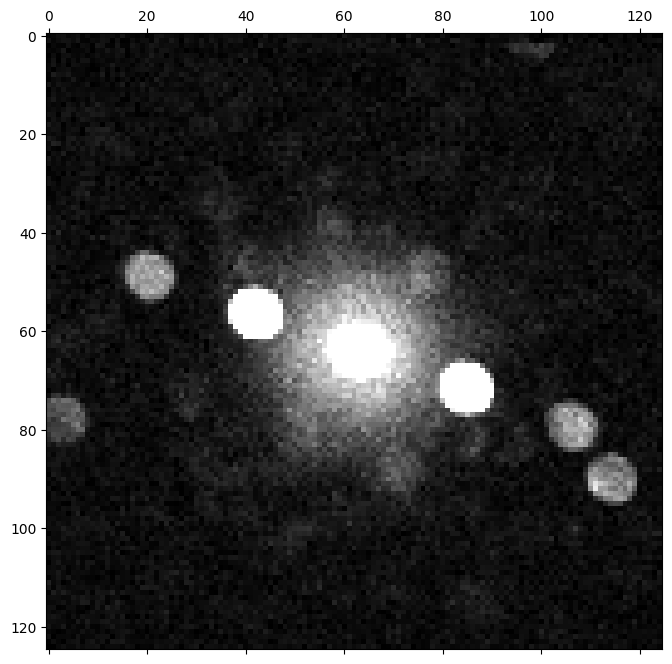

In [12]:
# alternatively, we can drop the `.data` and slice into `datacube` directly with the same result:

dp = datacube[10,30]

show(dp)

It's easy to plot this diffraction image, but we can't see any interesting features. We can only see the central spot, i.e. the unscattered Bragg disk. 

### Image scaling and contrast

To see more details, we need to either use a nonlinear map of intensity --> color, or adjust the color axis range. Both of these are accessed by adding some additional arguments to the `show()` function.

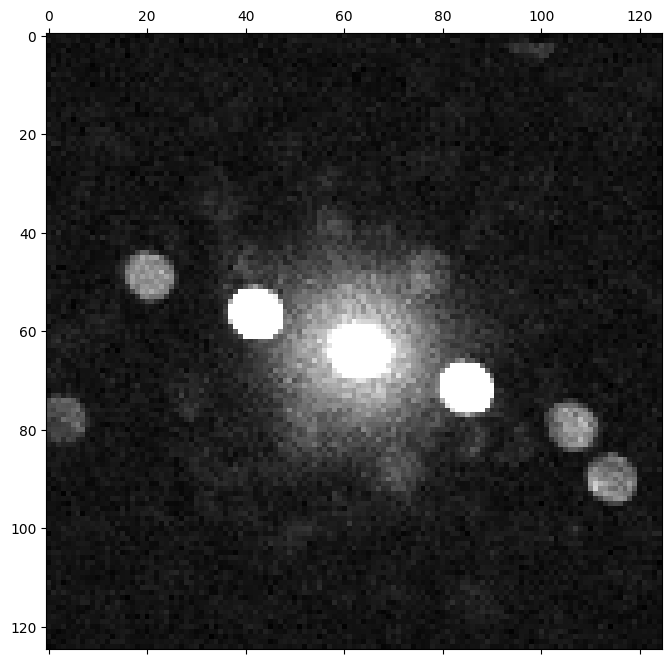

In [13]:
# Let's start by adjusting the color axis range. 
# This means specifiying which pixel intensity values we set to black (min) and which we set to white (max).
# To tell py4DSTEM we want to manually specify the color range to range from 0 to 500, we use these arguments:


py4DSTEM.visualize.show(
    dp,
    intensity_range='absolute',
    vmin=20,
    vmax=200,
    # cmap='viridis',
)

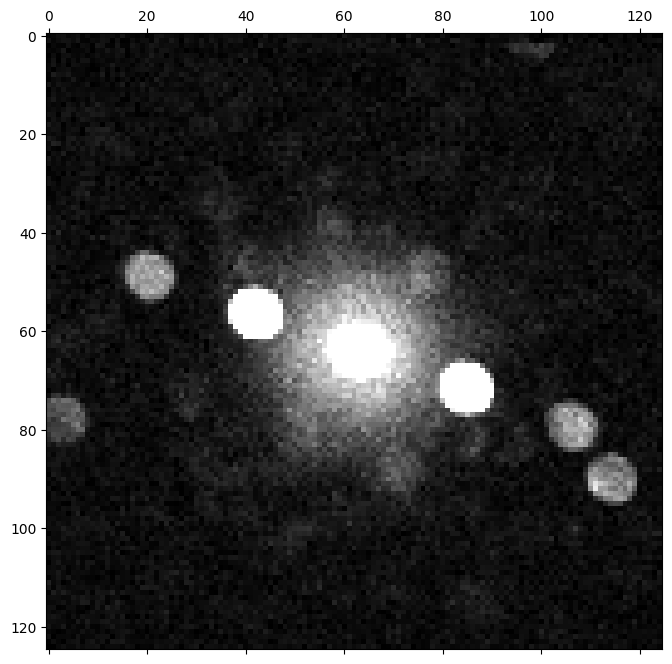

In [14]:
#We can also adjust the intensity range based on the fraction of distributed pixels. 
#The default is using this ordered method with a range of 0.02 - 0.98

py4DSTEM.visualize.show(
    dp,
    # intensity_range='ordered',
    # vmin=0,
    # vmax=1,
    # cmap='viridis',
)

Much more interesting! We can see several diffracted Bragg disks, and the distribution of electrons scattered randomly to low angles (characteristic of amorphous samples, or a plasmon background).

However, we had to saturate the center Bragg disk in order to see the weak features. Can we see both strong and weak features?

Yes! We just need to use logarithmic or power law scaling of the image intensity.

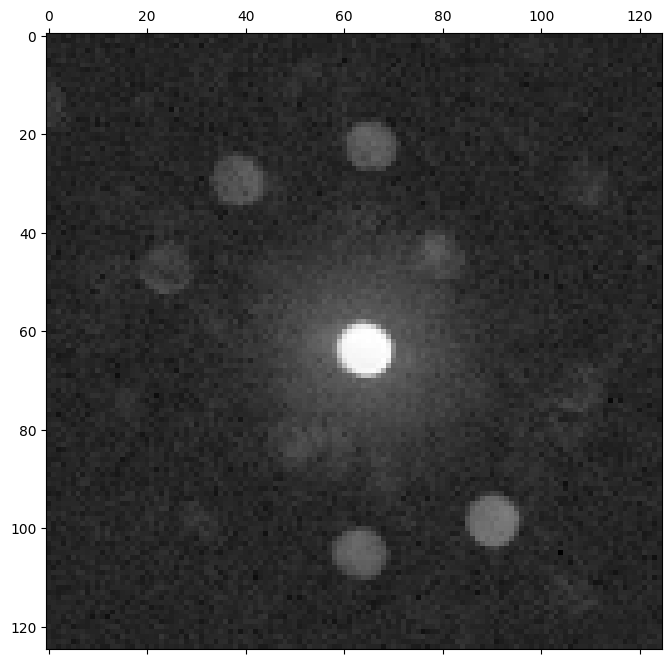

In [15]:
# The easiest thing to do is to logarithmic scaling

py4DSTEM.visualize.show(
    # dp,
    datacube.data[50,10],
    scaling='log',
    vmin = 0, 
    vmax = 1,
)

Now we can appreciate the full range of features present in the data:

- the very bright center disk
- somewhat weaker crystalline Bragg diffracted spots
- a small number of electrons randomly scattered to low angles

We can manually specify the intensity range for logarithm scaling too:

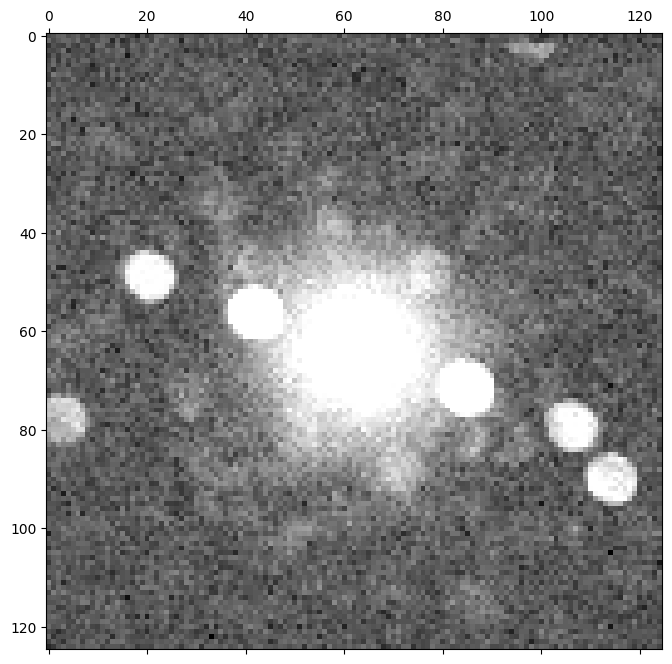

In [16]:
py4DSTEM.visualize.show(
    dp,
    scaling='log',
    vmin=0,
    vmax=0.95,
)

Logarithmic scaling is best when the features of interest have intensities which vary by multiple orders of magnitude.

However for visualization of diffraction patterns, scaling by a power law is often more useful. This is because we can tune the power (intensity^power) to achieve the desired scaling, and because the extremely weak features (such as detector dark current) are typically not that interesting.

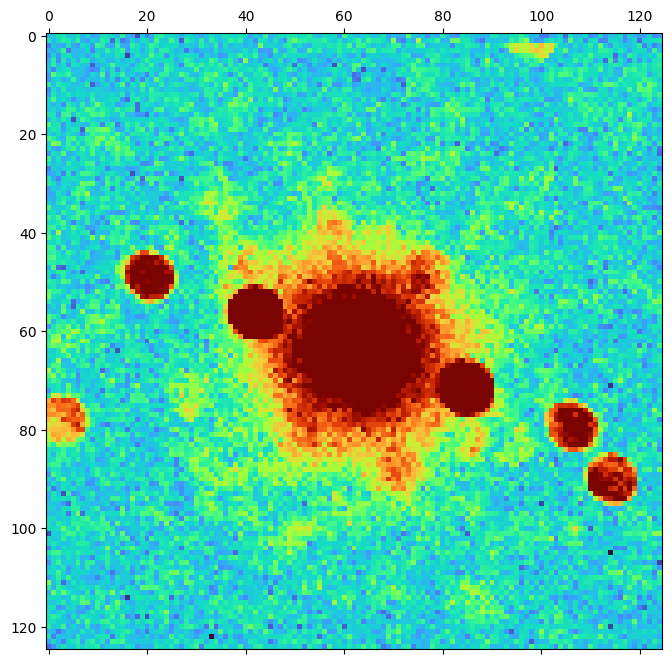

In [17]:
# Power law scaling using the cube root:
py4DSTEM.visualize.show(
    dp,
    scaling='power',
    power=0.25,
    vmin=0,
    vmax=0.95,
    cmap='turbo',
)

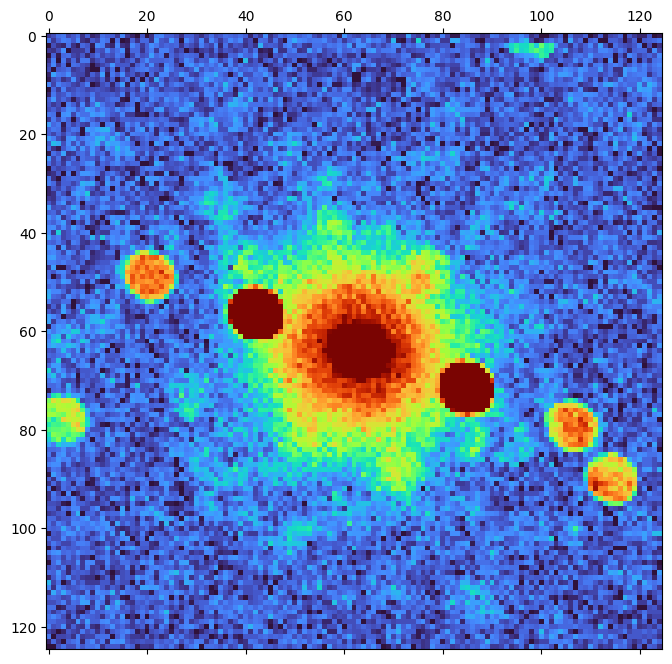

In [18]:
# Power law scaling using the quarter root:
py4DSTEM.visualize.show(
    dp,
    scaling='power',
    power=0.25,
    cmap='turbo',
)

### Mean and maximum diffraction patterns

The above examples look at a single diffraction pattern. Real experiments might consist of thousands or even millions of diffraction patterns. We want to evaluate the contents of the dataset as quickly as possible - is it single crystal? Polycrstalline? Amorphous? A mixture? To answer these questions, we need to operate on the entire dataset - the simplest such operation is to calculate the mean diffraction pattern.

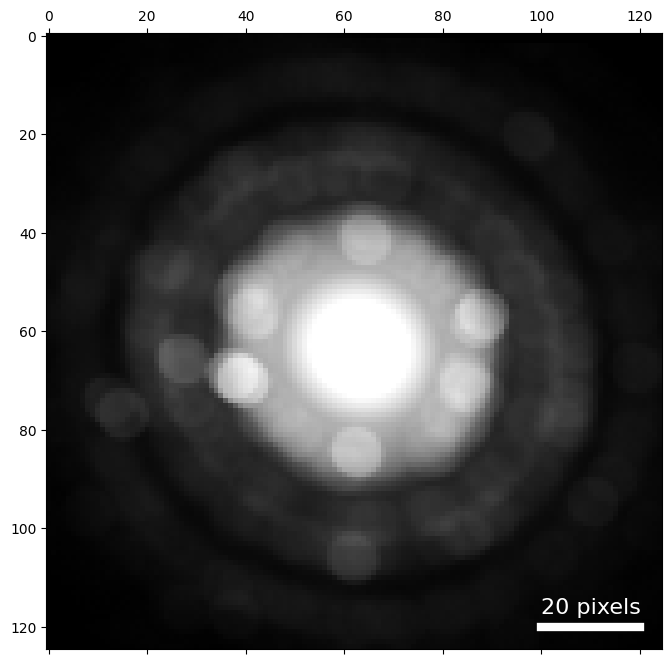

In [19]:
# Calculate the mean diffraction pattern:
dp_mean = datacube.get_dp_mean()

# Plot the mean diffraction pattern:
py4DSTEM.visualize.show(
    dp_mean,
    scaling='log',
)

In [20]:
# The mean diffraction pattern we calculated is stored in a native py4DSTEM datatype -
# in this case, the VirtualDiffraction class.

dp_mean

VirtualDiffraction( A 2-dimensional array of shape (125, 125) called 'dp_mean',
                    with dimensions:

                    dim0 = [0,1,...] pixels
                    dim1 = [0,1,...] pixels
)

In [21]:
# The data itself is just a numpy array

dp_mean.data

array([[33.19880952, 33.2647619 , 33.17714286, ..., 32.11107143,
        31.93238095, 32.04047619],
       [33.18404762, 33.25690476, 33.27964286, ..., 32.08547619,
        32.12119048, 32.1022619 ],
       [33.2497619 , 33.31821429, 33.35535714, ..., 32.97535714,
        32.92845238, 32.96880952],
       ...,
       [33.00154762, 33.20952381, 33.22166667, ..., 33.61547619,
        33.51166667, 33.32261905],
       [32.96488095, 33.1527381 , 33.12892857, ..., 33.46559524,
        33.3802381 , 33.45464286],
       [32.88392857, 33.15678571, 33.1697619 , ..., 33.51297619,
        33.40535714, 33.43166667]])

In [22]:
# We also don't need to save the output of `datacube.get_dp_mean()` to a variable if we don't want to -
# using a method of a datacube will typically store the output automatically to the datacube's tree

datacube.tree( 'dp_mean' )

VirtualDiffraction( A 2-dimensional array of shape (125, 125) called 'dp_mean',
                    with dimensions:

                    dim0 = [0,1,...] pixels
                    dim1 = [0,1,...] pixels
)

In [23]:
datacube.tree( 'dp_mean' ) is dp_mean

True

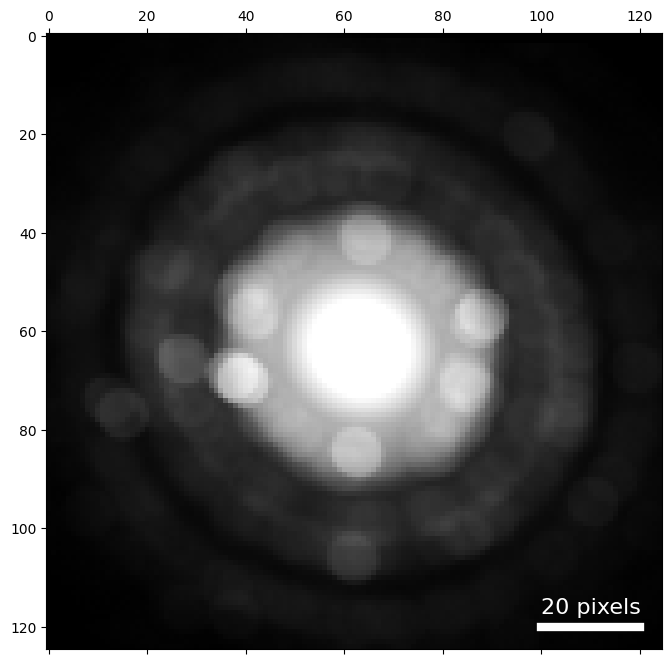

In [24]:
py4DSTEM.visualize.show(
    datacube.tree( 'dp_mean' ),
    scaling='log'
)

We see some interesting features, such as the ring of intensity containing some Bragg disks.  However, it's very difficult to see diffraction features which may occur in a small number of scan positions.

We have a standard solution to this problem - we typically visualize the **maximum** diffraction pattern, rather than the mean. By this, we mean the maximum signal of each pixel in diffraction space over all probe positons.

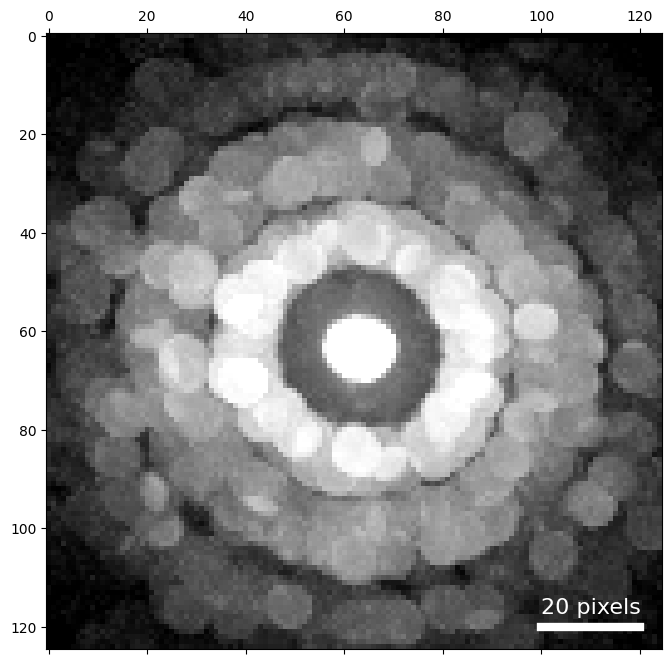

In [25]:
# Calculate maximum diffraction pattern:
dp_max = datacube.get_dp_max()

# Plot the maximum diffraction pattern:
py4DSTEM.visualize.show(
    dp_max,
    scaling='log'
)

Now we have a good idea of the contents of this 100 x 84 position dataset - various randomly oriented grains with strong Bragg diffraction.

# Virtual imaging

Next, let's visualize this data in real space using virtual detectors. Specifically, we will generate a virtual bright field (BF) and virtual dark field (DF) image. For this, we need to know the position of the center disk and an approximate radius for it.

## Bright field

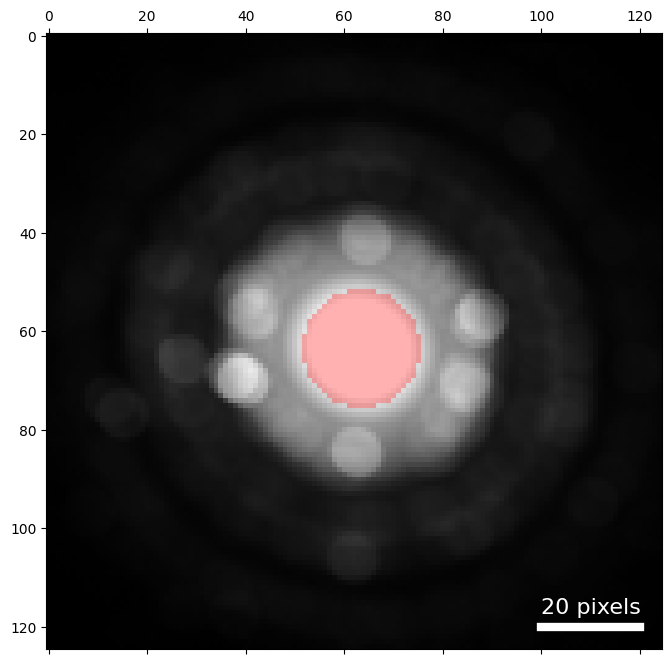

In [26]:
# Position the detector


# set the geometry by hand
center = (63.5,63.5)
radius = 12


# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'circle',
    geometry = (
        center,
        radius
    )
)

100%|█████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 32048.58it/s]


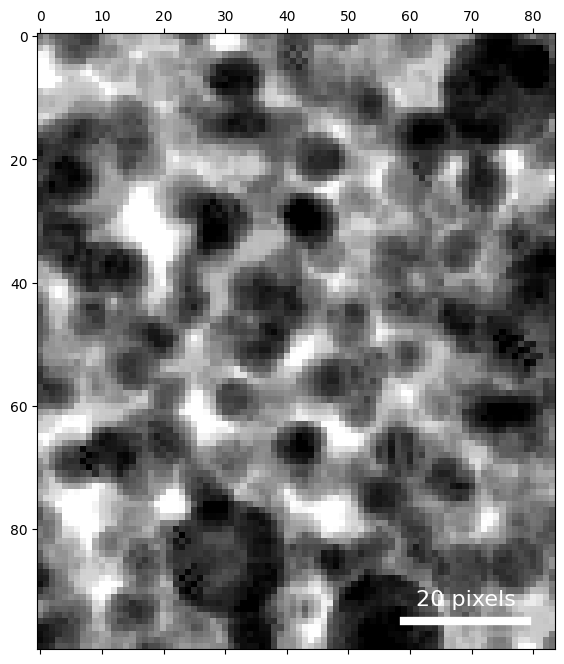

In [27]:
# Capture and show virtual BF

# compute
datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',       # the output will be stored in `datacube`'s tree with this name
)

# show
show( datacube.tree('bright_field') )

## Set geometry programmatically

Instead of determining the center and radius by hand, we can do so programmatically by determining the position and radius of the center beam.

Estimated probe radius = 5.12 pixels


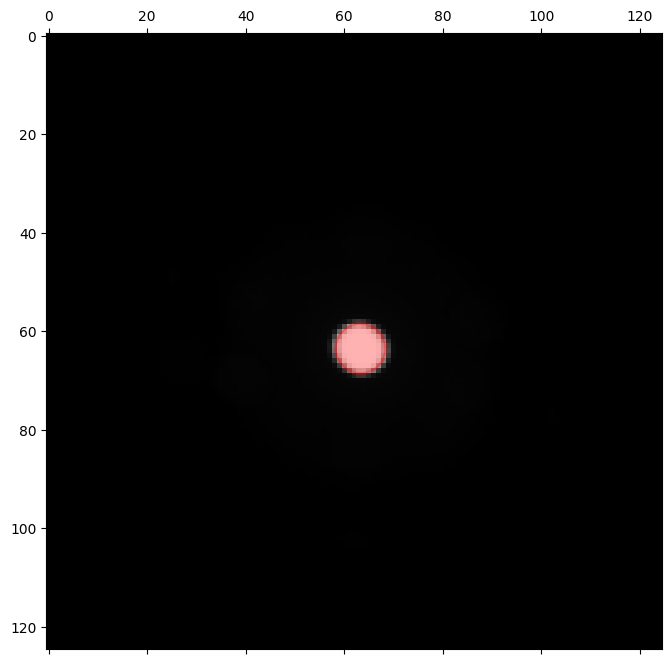

In [28]:
# Find the center and probe radius


# Get the probe position and size
probe_semiangle, probe_qx0, probe_qy0 = datacube.get_probe_size(
    datacube.tree('dp_mean').data,
)

# Print the estimated probe radius
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

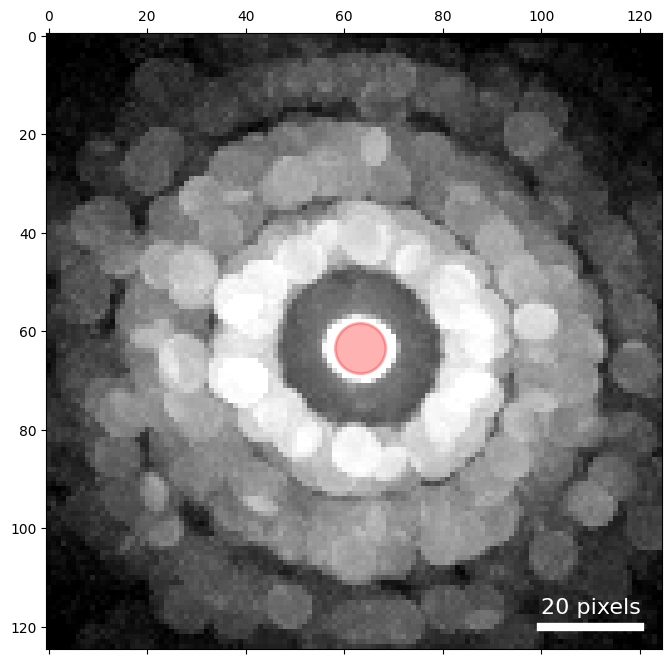

In [29]:
# Overlay the computed probe over the maximum diffraction pattern

show(
    dp_max, 
    scaling='log',
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle,
      'alpha':0.3,
      'fill':True
    }
)


The estimated probe size is slightly too small, because of the diffraction shift of this pattern. We could align all of the images, but it's typically much faster to just expand the bright field detector range.

### Annular dark-field imaging

For our bright-field image we set the geometry manually.  This time we'll use the center and probe size from above.

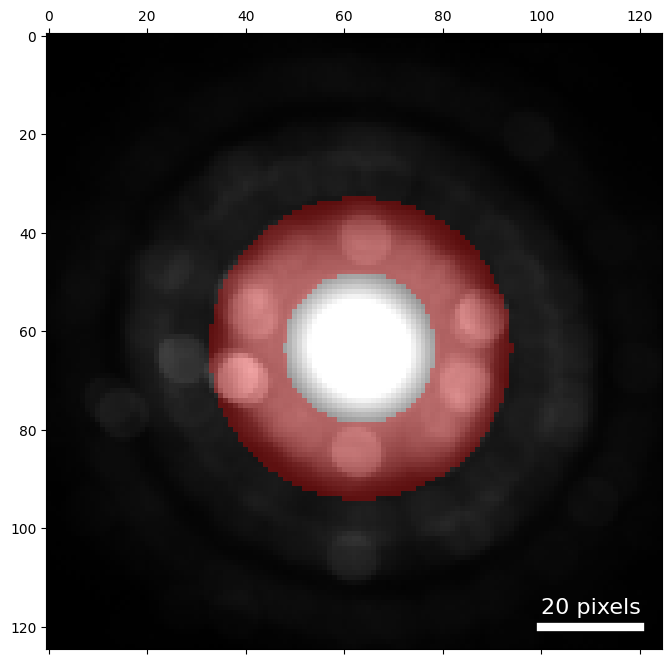

In [30]:
# Position the detector


# set the geometry
center = probe_qx0, probe_qy0
r_inner = probe_semiangle * 3
r_outer = probe_semiangle * 6
radii = r_inner,r_outer

# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'annular',
    geometry = (
        center,
        radii
    )
)

100%|█████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 32888.92it/s]


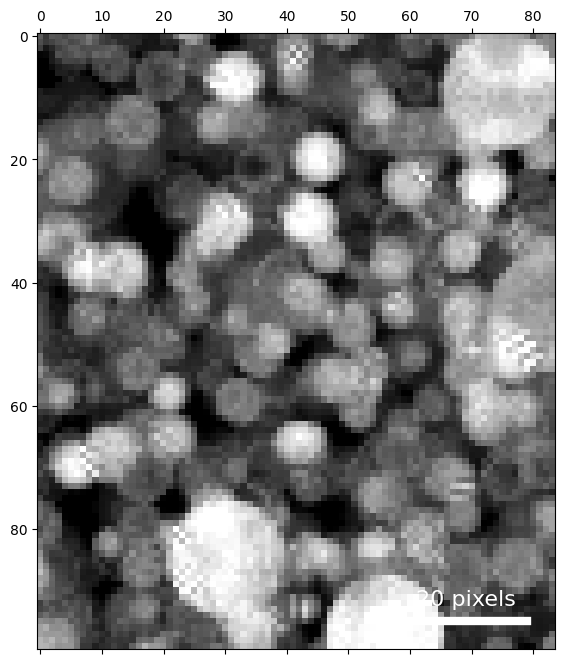

In [31]:
# Capture and show virtual ADF

# compute
datacube.get_virtual_image(
    mode = 'annulus',
    geometry = (center,radii),
    name = 'annular_dark_field'
)

# show
show(datacube.tree('annular_dark_field'))

### Off axis dark-field imaging

In traditional TEM dark-field imaging, the sample is illuminated with a parallel beam, and an aperture is placed in the diffraction plane around a point of interest, creating pattern in the image plane resulting from electrons scattered only through those areas of diffraction space.  We can create an analogous virtual image by placing a circular detector in an off-axis position in diffraction space.

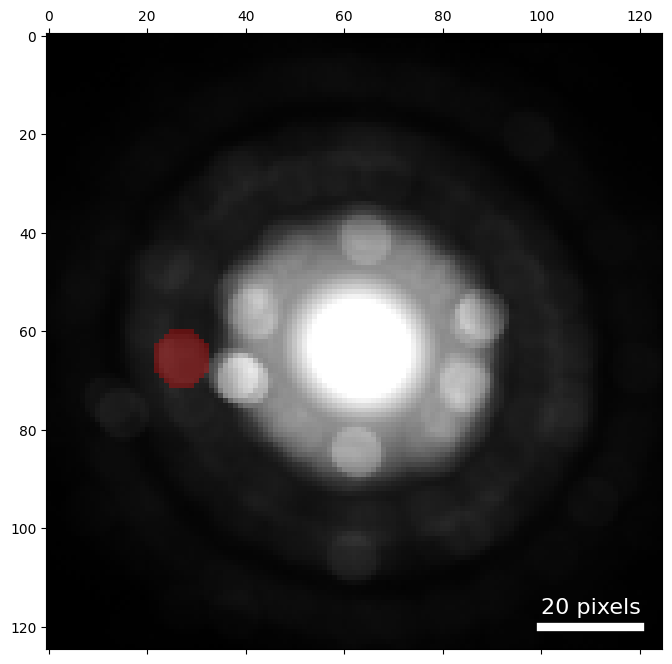

In [32]:
# Position detector


qx0_DF,qy0_DF = 65.5,27
#qx0_DF,qy0_DF = 84,62.5
r_DF = 6

geometry = (
    (qx0_DF,qy0_DF),
    r_DF
)

datacube.position_detector(
    mode = 'circular',
    geometry = geometry
)

100%|█████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 32765.78it/s]


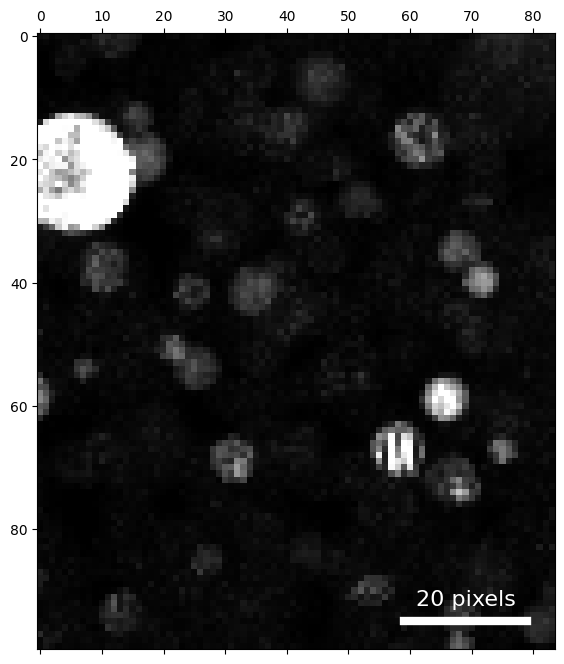

In [33]:
# Capture and display the DF image

datacube.get_virtual_image(
    mode = 'circle',
    geometry = geometry,
    name = 'virt_dark_field_01'
)
py4DSTEM.visualize.show(datacube.tree('virt_dark_field_01'))

# Virtual diffraction

We can also do the inverse - create an average diffraction pattern from some subset of scan positions, showing us what the scattering is like in just those positions in real space.

We've already done a little virtual diffraction - the mean and max diffraction patterns we computed at the beginning of this notebook.  In these cases we used all the data; below we'll compute similar patterns using only a selected subset of scan positions.

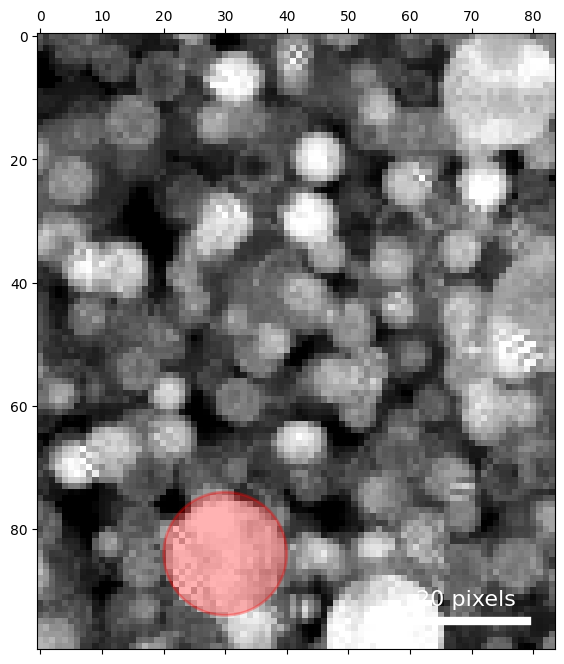

In [34]:
# Select a region of real space with a circular mask


# set geometry
mask_x0, mask_y0 = 84,30
mask_radius = 10
mask_geo = ((mask_x0,mask_y0),mask_radius)


# plot the mask geometry, overlaid onto the dark field image we created earlier
py4DSTEM.visualize.show(
    datacube.tree('annular_dark_field'),
    circle = {
      'center':(mask_x0, mask_y0),
      'R': mask_radius,
      'alpha':0.3,
      'fill':True
    }
)

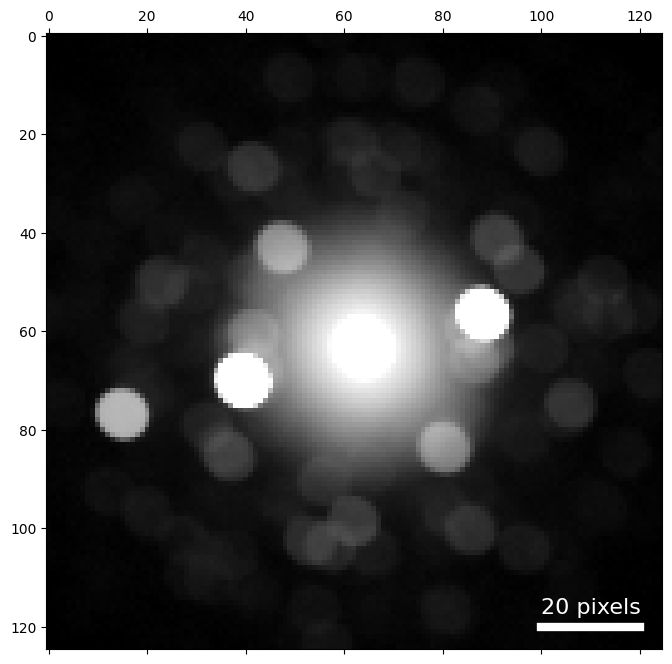

In [35]:
# Find the mean of the diffraction pattern in the specified region

selected_area_diffraction_01 = datacube.get_virtual_diffraction(
    method = 'mean',
    geometry = ((mask_x0, mask_y0),radius),
    mode = 'circular'
)

# show
py4DSTEM.visualize.show(
    selected_area_diffraction_01,
    scaling='log',
)

We placed our mask over one Au nanoparticle, so that average diffraction pattern above shows us something about the orientation of this particle.  In a later tutorial, we'll see how to map the crystallographic orientations of all the particles in the dataset.

# Write and read

In [36]:
# set a filepath

from os.path import splitext

filepath = splitext(filepath_data)[0] + '_analysis_basics_01.h5'
filepath

'/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/data_binned_analysis_basics_01.h5'

In [37]:
# inspect what's in `datacube`'s  tree

datacube.tree()

/
|---dp_mean
|---dp_max
|---bright_field
|---annular_dark_field
|---virt_dark_field_01
|---virtual_diffracton


In [38]:
# save everthing except the datacube

py4DSTEM.save(
    filepath,
    datacube,
    tree = None,  # this indicates saving everything *under* datacube, but not not datacube itself
    mode = 'o'      # if a file of this name already exists, overwrite it
)

In [39]:
# inspect the resulting HDF5 file

py4DSTEM.print_h5_tree(filepath)

/
|---polyAu_4DSTEM
    |---annular_dark_field
    |---bright_field
    |---dp_max
    |---dp_mean
    |---virt_dark_field_01
    |---virtual_diffracton




In [40]:
# check that it worked as expected - load everything:

d = py4DSTEM.read(filepath)

In [41]:
d.tree()

/
|---annular_dark_field
|---bright_field
|---dp_max
|---dp_mean
|---virt_dark_field_01
|---virtual_diffracton


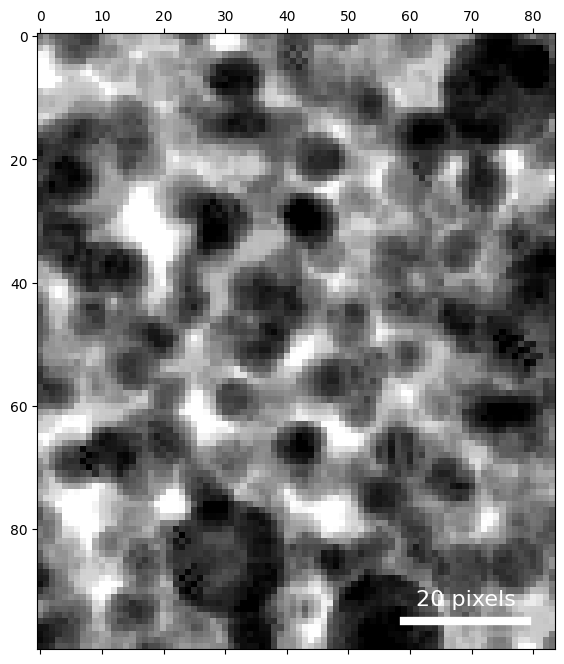

In [42]:
show(d.tree('bright_field'))